# A. Exploratory Data Analysis

<img src='https://i2.wp.com/hubmapconsortium.org/wp-content/uploads/2020/11/imageofweek.png?w=1200&ssl=1'>
<h1><center>HuBMAP: Hacking the Kidney - EDA</center></h1>
    
# 1. <a id='Introduction'>Introduction</a>

###  1.1 What is HuBMAP?
The [Human BioMolecular Atlas Program](https://hubmapconsortium.org/what-is-hubmap/) is a major endeavour working to catalyze the development of a framework for mapping the human body at single cell resolution.One component of this overarching goal is to identify medically relevant functional tissue units (FTUs) within whole slide microscopy images of human tissues. Once these FTUs are detected, information on size, shape, variability in number and location within the tissue samples can be used to help build a spatially accurate and semantically explicit model of the human body.

In [ ]:
from IPython.display import HTML
HTML('<center><iframe width="560" height="315" src="https://www.youtube.com/embed/yCh4XnD7rEE" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe></center>')

###  1.2 What is HuBMAP:Hacking the Kidney Competition?
- This compeition starts by mapping the human kidney at single cell resolution. We will detect the [functional tissue units](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4126067/)(FTU) accross different tissue preparation pipelines.By this we will implement a successful and robust glomeruli FTU detector.
- We also have the opportunity to present our findings to a panel of judges of this competition for additional consideration


### 1.3 What is FTU?
- An [FTU](https://pubmed.ncbi.nlm.nih.gov/24103658/) is defined as a “three-dimensional block of cells centered around a capillary, such that each cell in this block is within diffusion distance from any other cell in the same block”.Bernard de Bono and his team coined the term “functional tissue unit” in 2013 as: “...a three-dimensional block of cells centered around a capillary, such that each cell in this block is within diffusion distance from any other cell in the same block” [(de Bono, 2013)](https://www.ncbi.nlm.nih.gov/pubmed/24103658) One example of an FTU is the glomerulus found in the outer layer of  kidney tissue known as the cortex, which in humans has an area of about 800 mm<sup>2</sup> and average depth of about 9 mm [(Mounier-Vehier, 2002)](https://doi.org/10.1046/j.1523-1755.2002.00167.x). 
- Glomeruli consist of capillaries that facilitate filtration of waste products out of blood. Normal glomeruli typically range from 100-350 μm in diameter with a roughly spherical shape [(Kannan, 2019)](https://www.kireports.org/article/S2468-0249(19)30155-X/abstract). Refer to Figure 1 for a zoom sequence from the human body to single-cell level for kidney. Figure 2 highlights the cortex region of a tissue sample in green. Glomeruli contain four cell types: Parietal epithelial cells that form Bowman’s capsule, podocytes cover the outer layer of the filtration barrier, fenestrated endothelial cells that are coated with a glycolipid and glycoprotein matrix called glycocalyx that are in direct contact with blood and mesangial cells that occupy the space between the capillary blood vessel loops and are stained by the colorimetric histological stain called Periodic acid-Schiff (PAS) stain [(Vaughan, 2008)](https://doi.org/10.1681/ASN.2007040471). PAS stains polysaccharides (complex sugars like glycogen) such as those found in and around the glomeruli making it a favored stain for delineating them in tissue sections [(Agarwal, 2013)](https://doi.org/10.4103/0971-4065.114462). The periodic acid oxidizes the sugars to expose aldehyde free tips of the broken monosaccharide rings that react with the Schiff reagent to give a magenta color. Figure 3 is a light microscopy image that contains a glomerulus from a subsection of human kidney tissue stained with a PAS. One nucleus (spherical in shape) per cell, containing the genetic material for a cell (its chromosomes composed of nucleic acids) is stained dark bluish purple in the PAS stained images. The magenta stained regions in PAS stained tissue are the stained polysaccharides.

### 1.4 What do we need to do?
- We will develop segmentation algorithms that identify glomeruli in the PAS stained microscopy data. Yes, external data is allowed and/or pre-trained machine learning models in support of FTU segmentation.
- The leaderboard of this competition is calculated with approximately 42% of the test data.The final results will be based on the other 58%, so the final standings may be different.

### 1.5 Metric: Dice Coefficient.

![](https://miro.medium.com/max/858/1*yUd5ckecHjWZf6hGrdlwzA.png)

- Image Credits: https://en.wikipedia.org/wiki/S%C3%B8rensen%E2%80%93Dice_coefficient
- The evaluation metric of this competition is Dice Coefficient. 
The Dice coefficient can be used to compare the pixel-wise agreement between a predicted segmentation and its corresponding ground truth. The formula is given by:
  
<center>   $\Large  \frac{2*|X ∩ Y|}{|X|+|Y|}$   </center>

where X is the predicted set of pixels and Y is the ground truth.

- Dice coefficient, is a statistical tool which measures the similarity between two sets of data. This index has become arguably the most broadly used tool in the validation of image segmentation algorithms created with AI, but it is a much more general concept which can be applied sets of data for a variety of applications including NLP.
- Read more about it on the [Evaluation Page](https://www.kaggle.com/c/hubmap-kidney-segmentation/overview/supervised-ml-evaluation)

### 1.6 Relation between Dice Coefficient and Jaccard Score.

<center>   $\Large  D   =   \frac{2*|X ∩ Y|}{|X|+|Y|}$   </center>
<br>
<center>   $\Large  J =      \frac{|X ∩ Y|}{|X|+|Y|-|X ∩ Y|}$   </center>
<br>
<center>   $\Large  D = \frac{2J}{J+1}$   </center>
<br>
<center>   $\Large  J = \frac{D}{2-D}$   </center>

### 1.7 What has been achieved so far?

### *Automatic glomerular identification and quantification of histological phenotypes using image analysis and machine learning (Sheehan and Korstanje 2018)*

Current methods of scoring histological kidney samples, specifically glomeruli, do not allow for collection of quantitative data in a high-throughput and consistent manner. Neither untrained individuals nor computers are presently capable of identifying glomerular features, so expert pathologists must do the identification and score using a categorical matrix, complicating statistical analysis. Critical information regarding overall health and physiology is encoded in these samples. Rapid comprehensive histological scoring could be used, in combination with other physiological measures, to significantly advance renal research. Therefore, we used machine learning to develop a high-throughput method to automatically identify and collect quantitative data from glomeruli. Our method requires minimal human interaction between steps and provides quantifiable data independent of user bias. The method uses free existing software and is usable without extensive image analysis training. Validation of the classifier and feature scores in mice is highlighted in this work and shows the power of applying this method in murine research. Preliminary results indicate that the method can be applied to data sets from different species after training on relevant data, allowing for fast glomerular identification and quantitative measurements of glomerular features. Validation of the classifier and feature scores are highlighted in this work and show the power of applying this method. The resulting data are free from user bias. Continuous data, such that statistical analysis can be performed, allows for more precise and comprehensive interrogation of samples. These data can then be combined with other physiological data to broaden our overall understanding of renal function.

### *Glomerulus Classification and Detection Based on Convolutional Neural Networks (Gallego et al. 2018)*

Glomerulus classification and detection in kidney tissue segments are key processes in nephropathology used for the correct diagnosis of the diseases. In this paper, we deal with the challenge of automating Glomerulus classification and detection from digitized kidney slide segments using a deep learning framework. The proposed method applies Convolutional Neural Networks (CNNs) between two classes: Glomerulus and Non-Glomerulus, to detect the image segments belonging to Glomerulus regions. We configure the CNN with the public pre-trained AlexNet model and adapt it to our system by learning from Glomerulus and Non-Glomerulus regions extracted from training slides. Once the model is trained, labeling is performed by applying the CNN classification to the image blocks under analysis. The results of the method indicate that this technique is suitable for correct Glomerulus detection in Whole Slide Images (WSI), showing robustness while reducing false positive and false negative detections.

### *Region-Based Convolutional Neural Nets for Localization of Glomeruli in Trichrome-Stained Whole Kidney Sections (Bukowy et al. 2018)*

Background Histologic examination of fixed renal tissue is widely used to assess morphology and the progression of disease. Commonly reported metrics include glomerular number and injury. However, characterization of renal histology is a time-consuming and user-dependent process. To accelerate and improve the process, we have developed a glomerular localization pipeline for trichrome-stained kidney sections using a machine learning image classification algorithm.

Methods We prepared 4-μm slices of kidneys from rats of various genetic backgrounds that were subjected to different experimental protocols and mounted the slices on glass slides. All sections used in this analysis were trichrome stained and imaged in bright field at a minimum resolution of 0.92 μm per pixel. The training and test datasets for the algorithm comprised 74 and 13 whole renal sections, respectively, totaling over 28,000 glomeruli manually localized. Additionally, because this localizer will be ultimately used for automated assessment of glomerular injury, we assessed bias of the localizer for preferentially identifying healthy or damaged glomeruli.

Results Localizer performance achieved an average precision and recall of 96.94% and 96.79%, respectively, on whole kidney sections without evidence of bias for or against glomerular injury or the need for manual preprocessing.

Conclusions This study presents a novel and robust application of convolutional neural nets for the localization of glomeruli in healthy and damaged trichrome-stained whole-renal section mounts and lays the groundwork for automated glomerular injury scoring.

### *Segmentation of Glomeruli Within Trichrome Images Using Deep Learning (Kannan et al. 2019)*


 Introduction The number of glomeruli and glomerulosclerosis evaluated on kidney biopsy slides constitute standard components of a renal pathology report. Prevailing methods for glomerular assessment remain manual, labor intensive, and nonstandardized. We developed a deep learning framework to accurately identify and segment glomeruli from digitized images of human kidney biopsies. Methods Trichrome-stained images (n = 275) from renal biopsies of 171 patients with chronic kidney disease treated at the Boston Medical Center from 2009 to 2012 were analyzed. A sliding window operation was defined to crop each original image to smaller images. Each cropped image was then evaluated by at least 3 experts into 3 categories: (i) no glomerulus, (ii) normal or partially sclerosed (NPS) glomerulus, and (iii) globally sclerosed (GS) glomerulus. This led to identification of 751 unique images representing nonglomerular regions, 611 images with NPS glomeruli, and 134 images with GS glomeruli. A convolutional neural network (CNN) was trained with cropped images as inputs and corresponding labels as output. Using this model, an image processing routine was developed to scan the test images to segment the GS glomeruli. Results The CNN model was able to accurately discriminate nonglomerular images from NPS and GS images (performance on test data: Accuracy: 92.67% ± 2.02% and Kappa: 0.8681 ± 0.0392). The segmentation model that was based on the CNN multilabel classifier accurately marked the GS glomeruli on the test data (Matthews correlation coefficient = 0.628). Conclusion This work demonstrates the power of deep learning for assessing complex histologic structures from digitized human kidney biopsies.

# 2. <a id='importing'>Importing the necessary libraries📗</a> 

In [ ]:
import os
from os import listdir
import pandas as pd
import numpy as np
import glob
import tqdm
from typing import Dict
import matplotlib.pyplot as plt
import pandas_profiling as pdp
import json
%matplotlib inline
import shapely.geometry as sg
import shapely.ops as so
import zipfile
import cv2

#plotly
!pip install chart_studio
import plotly.express as px
import plotly.offline as pyo
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

#seaborn
import seaborn as sns

#color
from colorama import Fore, Back, Style

#networkx
import networkx as nx

import seaborn as sns
sns.set(style="whitegrid")

#tifffile
from PIL import Image
import tifffile as tiff
import cv2
from tqdm.notebook import tqdm
import zipfile

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# Settings for pretty nice plots
plt.style.use('fivethirtyeight')
plt.show()

# 3. <a id='reading'>Reading the train.csv 📚</a>

In [ ]:
# List files available
list(os.listdir("../input/hubmap-kidney-segmentation"))

In [ ]:
IMAGE_PATH = "../input/hubmap-kidney-segmentation/"

train_df = pd.read_csv('../input/hubmap-kidney-segmentation/train.csv')
hubmap_df = pd.read_csv('../input/hubmap-kidney-segmentation/HuBMAP-20-dataset_information.csv')
test_df = pd.read_csv('../input/hubmap-kidney-segmentation/sample_submission.csv')

print(Fore.YELLOW + 'Training data shape: ',Style.RESET_ALL,train_df.shape)
print(Fore.YELLOW + 'HubMap data shape: ',Style.RESET_ALL,hubmap_df.shape)
print(Fore.YELLOW + 'Test data shape: ',Style.RESET_ALL,test_df.shape)

train_df.head(5)

In [ ]:
hubmap_df.head(5)

In [ ]:
hubmap_df.groupby(['race']).count()['sex'].to_frame()

# 4.<a id='basic'>Basic Data Exploration 🏕️</a> 

## General Information

In [ ]:
# Null values and Data types
print(Fore.YELLOW + 'Train Set !!',Style.RESET_ALL)
print(train_df.info())
print('-------------')
print(Fore.BLUE + 'Test Set !!',Style.RESET_ALL)
print(test_df.info())
print('-------------')
print(Fore.GREEN + 'HuBMAP Set !!',Style.RESET_ALL)
print(hubmap_df.info())

### Missing values

In [ ]:
hubmap_df.isna().sum()

In [ ]:
train_df.isna().sum()

There are 3 missing values in hubmap_df and no missing values in train_df

In [ ]:
! ls ../input/hubmap-kidney-segmentation/train/

We can see that there are `16` json files and `8` tiff files

In [ ]:
# Total number of Patient in the dataset(train+test)

print(Fore.YELLOW +"Total Patients in Train set: ",Style.RESET_ALL,train_df['id'].count())
print(Fore.BLUE +"Total Patients in Test set: ",Style.RESET_ALL,test_df['id'].count())

`5` : Patients in Test Set

`8` : Patients in Train Set

## Unique Patients(Ids)

In [ ]:
print(Fore.YELLOW + "The total patient ids are",Style.RESET_ALL,f"{train_df['id'].count()},", Fore.BLUE + "from those the unique ids are", Style.RESET_ALL, f"{train_df['id'].value_counts().shape[0]}.")

In [ ]:
train_patient_ids = set(train_df['id'].unique())
test_patient_ids = set(test_df['id'].unique())

train_patient_ids.intersection(test_patient_ids)

We see `none` patients in test set that can be found in train set.

In [ ]:
columns = train_df.keys()
columns = list(columns)
print(columns)

### Patient Counts

In [ ]:
train_df['id'].value_counts().max()

In [ ]:
test_df['id'].value_counts().max()

In train and test sets, we can see one Patient and it mean Patient id is unique

## Number of Patients and Files in Training Images Folder

In [ ]:
files = folders = 0
folder_names = {'a'}
folder_names.remove('a')

path = "../input/hubmap-kidney-segmentation/train"

for _, dirnames, filenames in os.walk(path):
  # ^ this idiom means "we won't be using this value"
    files += len(filenames)
    for j in range(files):
        folder_names.add(filenames[j][:9])
    folders = len(folder_names)
#print(Fore.YELLOW +"Total Patients in Train set: ",Style.RESET_ALL,train_df['Patient'].count())
print(Fore.YELLOW +f'{files:,}',Style.RESET_ALL,"files, " + Fore.BLUE + f'{folders:,}',Style.RESET_ALL ,'patients/ids')

In [ ]:
files = folders = 0
folder_names = {'a'}
folder_names.remove('a')

path = "../input/hubmap-kidney-segmentation/test"

for _, dirnames, filenames in os.walk(path):
  # ^ this idiom means "we won't be using this value"
    files += len(filenames)
    for j in range(files):
        folder_names.add(filenames[j][:9])
    folders = len(folder_names)
#print(Fore.YELLOW +"Total Patients in Train set: ",Style.RESET_ALL,train_df['Patient'].count())
print(Fore.YELLOW +f'{files:,}',Style.RESET_ALL,"files, " + Fore.BLUE + f'{folders:,}',Style.RESET_ALL ,'patients/ids')

## JSON FILES COUNT

In [ ]:
files = folders = 0
folder_names = {'a'}
folder_names.remove('a')

path = "../input/hubmap-kidney-segmentation/train"

for _, dirnames, filenames in os.walk(path):
  # ^ this idiom means "we won't be using this value"
    files += len(filenames)
    for j in range(files):
        if filenames[j][-4:]=='json':
            folder_names.add(filenames[j][:9])
    folders = len(folder_names)
#print(Fore.YELLOW +"Total Patients in Train set: ",Style.RESET_ALL,train_df['Patient'].count())
print(Fore.YELLOW +f'{folders:,}',Style.RESET_ALL," json-files")

In [ ]:
files = folders = 0
folder_names = {'a'}
folder_names.remove('a')

path = "../input/hubmap-kidney-segmentation/test"

for _, dirnames, filenames in os.walk(path):
  # ^ this idiom means "we won't be using this value"
    files += len(filenames)
    for j in range(files):
        if filenames[j][-4:]=='json':
            folder_names.add(filenames[j][:9])
    folders = len(folder_names)
#print(Fore.YELLOW +"Total Patients in Train set: ",Style.RESET_ALL,train_df['Patient'].count())
print(Fore.YELLOW +f'{folders:,}',Style.RESET_ALL," json-files")

## Reading Normal json files

In [ ]:
files = 0
path = "../input/hubmap-kidney-segmentation/train"

for _, dirnames, filenames in os.walk(path):
  # ^ this idiom means "we won't be using this value"
    files += len(filenames)
    for j in range(files):
        if filenames[j][-4:]=='json' and len(filenames[j])<15:
            df = pd.read_json(f'../input/hubmap-kidney-segmentation/train/{filenames[j]}')
            print(Fore.RED + f'{df.shape[0]}',Style.RESET_ALL, "rows and "+ Fore.GREEN + f'{df.shape[1]}',Style.RESET_ALL,f" columns in the {filenames[j][:-5]} json file")

We can see that there are no normal json files in the test set.

In [ ]:
files = 0
path = "../input/hubmap-kidney-segmentation"
i = 0

for _, dirnames, filenames in os.walk(path):
  # ^ this idiom means "we won't be using this value"
    if i==0:
        i += 1
        files += len(filenames)
        for j in range(files):
            if filenames[j][-4:]=='json' and len(filenames[j])<15:
                df = pd.read_json(f'../input/hubmap-kidney-segmentation/{filenames[j]}')
                print(Fore.RED + f'{df.shape[0]}',Style.RESET_ALL, "rows and "+ Fore.GREEN + f'{df.shape[1]}',Style.RESET_ALL,f" columns in the {filenames[j][:-5]} json file")

## Reading anatomical-structure json files

In [ ]:
files = 0
path = "../input/hubmap-kidney-segmentation/train"

for _, dirnames, filenames in os.walk(path):
  # ^ this idiom means "we won't be using this value"
    files += len(filenames)
    for j in range(files):
        if filenames[j][-4:]=='json' and len(filenames[j])>15:
            df = pd.read_json(f'../input/hubmap-kidney-segmentation/train/{filenames[j]}')
            print(Fore.RED + f'{df.shape[0]}',Style.RESET_ALL, "rows and "+ Fore.GREEN + f'{df.shape[1]}',Style.RESET_ALL,f" columns in the {filenames[j][:-5]} json file")

In [ ]:
files = 0
path = "../input/hubmap-kidney-segmentation/test"

for _, dirnames, filenames in os.walk(path):
  # ^ this idiom means "we won't be using this value"
    files += len(filenames)
    for j in range(files):
        if filenames[j][-4:]=='json' and len(filenames[j])>15:
            df = pd.read_json(f'../input/hubmap-kidney-segmentation/test/{filenames[j]}')
            print(Fore.RED + f'{df.shape[0]}',Style.RESET_ALL, "rows and "+ Fore.GREEN + f'{df.shape[1]}',Style.RESET_ALL,f" columns in the {filenames[j][:-5]} json file")

In [ ]:
files = 0
path = "../input/hubmap-kidney-segmentation"
i = 0

for _, dirnames, filenames in os.walk(path):
  # ^ this idiom means "we won't be using this value"
    if i==0:
        i += 1
        files += len(filenames)
        for j in range(files):
            if filenames[j][-4:]=='json' and len(filenames[j])>15:
                df = pd.read_json(f'../input/hubmap-kidney-segmentation/{filenames[j]}')
                print(Fore.RED + f'{df.shape[0]}',Style.RESET_ALL, "rows and "+ Fore.GREEN + f'{df.shape[1]}',Style.RESET_ALL,f" columns in the {filenames[j][:-5]} json file")

In [ ]:
train_df.head()

We see some encoding column over there. This encoding column is RLE-encoded representation of the mask for the objects in the image.

## What is this RLE Encoding?

[Run-length encoding](https://en.wikipedia.org/wiki/Run-length_encoding) (RLE) is a form of lossless data compression in which runs of data (sequences in which the same data value occurs in many consecutive data elements) are stored as a single data value and count, rather than as the original run. This is most useful on data that contains many such runs. Consider, for example, simple graphic images such as icons, line drawings, Conway's Game of Life, and animations. It is not useful with files that don't have many runs as it could greatly increase the file size. 

![](https://i.ytimg.com/vi/mX4tdOEpFXw/hqdefault.jpg)

## Sample code for RLE Encoding

In [ ]:
# Perform Run Length Encoding (RLE) data compression algorithm on string
def encode(s):

    encoding = "" 
    i = 0
    while i < len(s):
        # count occurrences of character at index i
        count = 1

        while i + 1 < len(s) and s[i] == s[i + 1]:
            count = count + 1
            i = i + 1
        encoding += str(count) + s[i]
        i = i + 1

    return encoding
s = "ABBCCCD"
print(encode(s))


## Advantages and Disadvantages Of RLE:

This [algorithm](https://www.prepressure.com/library/compression-algorithm/rle) is very easy to implement and does not require much CPU horsepower. RLE compression is only efficient with files that contain lots of repetitive data. These can be text files if they contain lots of spaces for indenting but line-art images that contain large white or black areas are far more suitable. Computer-generated color images (e.g. architectural drawings) can also give fair compression ratios. And this is used to compress Tiff and Pdf files.

## How Run Length Encoding is used Here

In order to reduce the submission file size, we must submit segmentation results using run-length encoding on the pixel values. That is, instead of submitting an exhaustive list of indices for your segmentation, you will submit pairs of values that contain a start position and a run length. E.g. '0 3' implies starting at pixel 0 and running a total of 3 pixels (0,1,2). The competition format requires a space delimited list of pairs. For example, '0 3 10 5' implies pixels 0,1,2, and 10,11,12,13,14 are to be included in the mask. The metric checks that the pairs are sorted, positive, and the decoded pixel values are not duplicated. The pixels are numbered from top to bottom, then left to right: 0 is pixel (0,0), 1 is pixel (1,0), and 2 is pixel (2,0) etc., see Figure 1.

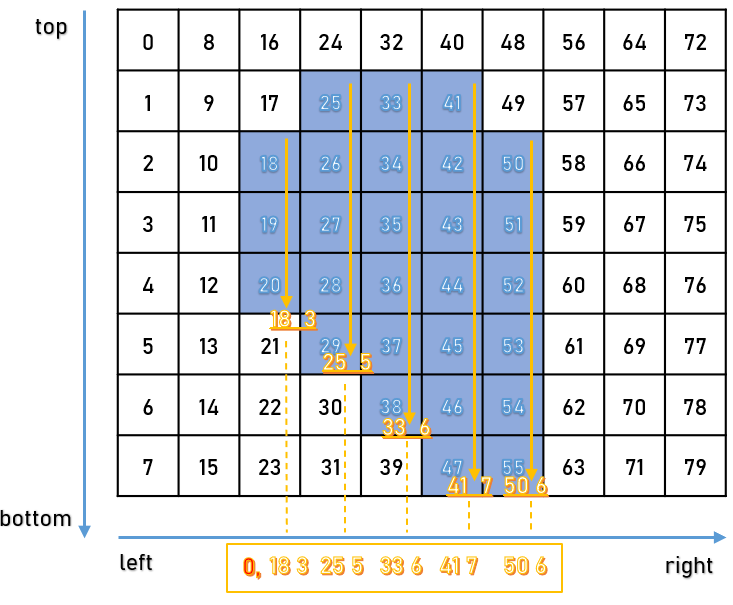



![](https://image.slidesharecdn.com/runlengthencoding-130119224310-phpapp01/95/run-length-encoding-11-638.jpg?cb=1358635426)

# 5. <a id='details'>Data Exploration in Details 🎠</a>

Getting the columns in hubmap_df

In [ ]:
hubmap_df["split"] = "test"
hubmap_df.loc[hubmap_df["image_file"].isin(os.listdir(os.path.join(IMAGE_PATH, "train"))), "split"] = "train"

In [ ]:
hubmap_df.columns

## Parallel Category Diagram

In [ ]:
parallel_diagram = hubmap_df[['patient_number','age','sex','race','percent_cortex']]
fig = px.parallel_categories(parallel_diagram, color_continuous_scale=px.colors.sequential.Inferno)
fig.update_layout(title='Parallel category diagram 1 on hubmap set')
fig.show()

In [ ]:
parallel_diagram = hubmap_df[['patient_number','age','sex','race','percent_medulla']]
fig = px.parallel_categories(parallel_diagram, color_continuous_scale=px.colors.sequential.Inferno)
fig.update_layout(title='Parallel category diagram 2 on hubmap set')
fig.show()

In [ ]:
def dist(df,column,color):
    sns.distplot(df[column],label=column,color=color)
    plt.legend()

## Exploring the 'race' columns

In [ ]:
hubmap_df[['race','split']].value_counts()

In [ ]:
hubmap_df[['race','split']].value_counts().iplot(kind='bar',
                                              yTitle='Counts', 
                                              linecolor='black', 
                                              opacity=0.7,
                                              color='blue',
                                              theme='pearl',
                                              bargap=0.5,
                                              gridcolor='white',
                                              title='Distribution of the race column in the HuBMAP-20 Set')

In [ ]:
df = hubmap_df.groupby(['race','split'])['race'].count().reset_index(name = 'counts')
df['race_split'] = df['race']+'_'+df['split']
fig = px.pie(df, values='counts', names='race_split', title='Patient Race Count')
fig.update_layout(
    autosize=False,
    width=800,
    height=650,
    margin=dict(
        l=50,
        r=50,
        b=50,
        t=50,
        pad=4
    ),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

In [ ]:
df = hubmap_df.groupby(['race','split'])['race'].count().reset_index(name = 'counts')
plt.figure(figsize=(10,10))
dist(df,"counts","red")

In [ ]:
white = hubmap_df[hubmap_df['race']=='White']
black = hubmap_df[hubmap_df['race']=='Black or African American']
count_white = white['split'].value_counts().reset_index()
count_black = black['split'].value_counts().reset_index()
pie_white = go.Pie(labels=count_white['index'],values=count_white['split'],name="White",hole=0.4,domain={'x': [0,0.46]})
pie_black = go.Pie(labels=count_black['index'],values=count_black['split'],name="Black or African American",hole=0.5,domain={'x': [0.52,1]})
layout = dict(title = 'Race', font=dict(size=10), legend=dict(orientation="h"),
              annotations = [dict(x=0.2, y=0.5, text='White', showarrow=False, font=dict(size=20)),
                             dict(x=0.8, y=0.5, text='Black or African American', showarrow=False, font=dict(size=20)) ])

fig = dict(data=[pie_white, pie_black], layout=layout)
pyo.iplot(fig)

`9` : White - `5` : Train, `4` : Test

`4` : Black or African American  `3` : Train, `1` : Test

### Network Graph

In [ ]:
fig, ax = plt.subplots(figsize = (20, 12))
for i, t in enumerate(hubmap_df['race'].unique()):
    hubmap_df_type = hubmap_df.loc[hubmap_df['race'] == t]
    bad_weight = list(hubmap_df_type['weight_kilograms'].value_counts(normalize=True)[hubmap_df_type['weight_kilograms'].value_counts(normalize=True) < 0.01].index)
    bad_height = list(hubmap_df_type['height_centimeters'].value_counts(normalize=True)[hubmap_df_type['height_centimeters'].value_counts(normalize=True) < 0.01].index)
    bad_mes = list(set(bad_weight + bad_height))
    hubmap_df_type = hubmap_df_type.loc[(hubmap_df_type['weight_kilograms'].isin(bad_weight) == False) & (hubmap_df_type['height_centimeters'].isin(bad_height) == False)]
    G = nx.from_pandas_edgelist(hubmap_df_type, 'weight_kilograms', 'height_centimeters', ['bmi_kg/m^2'])
    plt.subplot(2, 1, i + 1);
    nx.draw(G, with_labels=True);
    plt.title(f'Network Graph for race {t}')

## Exploring the Patient Number Columns

In [ ]:
hubmap_df[['patient_number','split']].value_counts()

In [ ]:
hubmap_df[['patient_number','split']].value_counts().iplot(kind='bar',
                                              yTitle='Counts', 
                                              linecolor='black', 
                                              opacity=0.7,
                                              color='red',
                                              theme='pearl',
                                              bargap=0.5,
                                              gridcolor='white',
                                              title='Distribution of the patient_number column in the HuBMAP-20 Set')

In [ ]:
df = hubmap_df.groupby(['patient_number','split'])['patient_number'].count().reset_index(name = 'counts')
df['patient_number_split'] = df['patient_number'].astype('str')+'_'+df['split']
fig = px.pie(df, values='counts', names='patient_number_split', title='Patient Number Count')
fig.update_layout(
    autosize=False,
    width=800,
    height=650,
    margin=dict(
        l=50,
        r=50,
        b=50,
        t=50,
        pad=4
    ),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

### Network Graph

In [ ]:
fig, ax = plt.subplots(figsize = (20, 12))
for i, t in enumerate(hubmap_df['patient_number'].unique()):
    hubmap_df_type = hubmap_df.loc[hubmap_df['patient_number'] == t]
    bad_weight = list(hubmap_df_type['weight_kilograms'].value_counts(normalize=True)[hubmap_df_type['weight_kilograms'].value_counts(normalize=True) < 0.01].index)
    bad_height = list(hubmap_df_type['height_centimeters'].value_counts(normalize=True)[hubmap_df_type['height_centimeters'].value_counts(normalize=True) < 0.01].index)
    bad_mes = list(set(bad_weight + bad_height))
    hubmap_df_type = hubmap_df_type.loc[(hubmap_df_type['weight_kilograms'].isin(bad_weight) == False) & (hubmap_df_type['height_centimeters'].isin(bad_height) == False)]
    G = nx.from_pandas_edgelist(hubmap_df_type, 'weight_kilograms', 'height_centimeters', ['bmi_kg/m^2'])
    plt.subplot(5, 2, i + 1);
    nx.draw(G, with_labels=True);
    plt.title(f'Network Graph for patient_number {t}')

## Exploring the Ethinicity Column

In [ ]:
hubmap_df[['ethnicity','split']].value_counts()

In [ ]:
hubmap_df[['ethnicity','split']].value_counts().iplot(kind='bar',
                                              yTitle='Counts', 
                                              linecolor='black', 
                                              opacity=0.7,
                                              color='green',
                                              theme='pearl',
                                              bargap=0.5,
                                              gridcolor='white',
                                              title='Distribution of the Ethnicity column in the HuBMAP-20 Set')

In [ ]:
df = hubmap_df.groupby(['ethnicity','split'])['ethnicity'].count().reset_index(name = 'counts')
df['ethnicity_split'] = df['ethnicity']+'_'+df['split']
fig = px.pie(df, values='counts', names='ethnicity_split', title='Patient Ethnicity Count')
fig.update_layout(
    autosize=False,
    width=800,
    height=650,
    margin=dict(
        l=50,
        r=50,
        b=50,
        t=50,
        pad=4
    ),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

## Exploring the sex columns

In [ ]:
hubmap_df[['sex','split']].value_counts()

In [ ]:
hubmap_df[['sex','split']].value_counts().iplot(kind='bar',
                                              yTitle='Counts', 
                                              linecolor='black', 
                                              opacity=0.7,
                                              color='yellow',
                                              theme='pearl',
                                              bargap=0.5,
                                              gridcolor='white',
                                              title='Distribution of the Sex column in the HuBMAP-20 Set')

In [ ]:
df = hubmap_df.groupby(['sex','split'])['sex'].count().reset_index(name = 'counts')
df['sex_split'] = df['sex']+'_'+df['split']
fig = px.pie(df, values='counts', names='sex_split', title='Patient Gender Count')
fig.update_layout(
    autosize=False,
    width=800,
    height=650,
    margin=dict(
        l=50,
        r=50,
        b=50,
        t=50,
        pad=4
    ),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

In [ ]:
male = hubmap_df[hubmap_df['sex']=='Male']
female = hubmap_df[hubmap_df['sex']== 'Female']
count_male = male['split'].value_counts().reset_index()
count_female = female['split'].value_counts().reset_index()
pie_male = go.Pie(labels=count_male['index'],values=count_male['split'],name="Male",hole=0.4,domain={'x': [0,0.46]})
pie_female = go.Pie(labels=count_female['index'],values=count_female['split'],name="Female",hole=0.5,domain={'x': [0.52,1]})
layout = dict(title = 'Sex', font=dict(size=10), legend=dict(orientation="h"),
              annotations = [dict(x=0.2, y=0.5, text='Male', showarrow=False, font=dict(size=20)),
                             dict(x=0.8, y=0.5, text='Female', showarrow=False, font=dict(size=20)) ])

fig = dict(data=[pie_male, pie_female], layout=layout)
pyo.iplot(fig)

## Exploring the age columns

In [ ]:
hubmap_df[['age','split']].value_counts()

In [ ]:
hubmap_df[['age','split']].value_counts().iplot(kind='bar',
                                              yTitle='Counts', 
                                              linecolor='black', 
                                              opacity=0.7,
                                              color='orange',
                                              theme='pearl',
                                              bargap=0.5,
                                              gridcolor='white',
                                              title='Distribution of the Age column in the HuBMAP-20 Set')

In [ ]:
df = hubmap_df.groupby(['age','split'])['age'].count().reset_index(name = 'counts')
df['age_split'] = df['age'].astype('str')+'_'+df['split']
fig = px.pie(df, values='counts', names='age_split', title='Patient Ages Count')
fig.update_layout(
    autosize=False,
    width=800,
    height=650,
    margin=dict(
        l=50,
        r=50,
        b=50,
        t=50,
        pad=4
    ),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

## Exploring the Laterality Column

In [ ]:
hubmap_df[['laterality','split']].value_counts()

In [ ]:
hubmap_df[['laterality','split']].value_counts().iplot(kind='bar',
                                              yTitle='Counts', 
                                              linecolor='black', 
                                              opacity=0.7,
                                              color='purple',
                                              theme='pearl',
                                              bargap=0.5,
                                              gridcolor='white',
                                              title='Distribution of the Laterality column in the HuBMAP-20 Set')

In [ ]:
df = hubmap_df.groupby(['laterality','split'])['laterality'].count().reset_index(name = 'counts')
df['laterality_split'] = df['laterality']+'_'+df['split']
fig = px.pie(df, values='counts', names='laterality_split', title='Patient Laterality Count')
fig.update_layout(
    autosize=False,
    width=800,
    height=650,
    margin=dict(
        l=50,
        r=50,
        b=50,
        t=50,
        pad=4
    ),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

## Exploring the Percent Medulla Column

In [ ]:
hubmap_df[['percent_medulla','split']].value_counts()

In [ ]:
hubmap_df[['percent_medulla','split']].value_counts().iplot(kind='bar',
                                              yTitle='Counts', 
                                              linecolor='black', 
                                              opacity=0.7,
                                              color='pink',
                                              theme='pearl',
                                              bargap=0.5,
                                              gridcolor='white',
                                              title='Distribution of the Medulla column in the HuBMAP-20 Set')

In [ ]:
df = hubmap_df.groupby(['percent_medulla','split'])['percent_medulla'].count().reset_index(name = 'counts')
df['percent_medulla_split'] = df['percent_medulla'].astype('str')+'_'+df['split']
fig = px.pie(df, values='counts', names='percent_medulla_split', title='Patient Percent_Medulla Count')
fig.update_layout(
    autosize=False,
    width=800,
    height=650,
    margin=dict(
        l=50,
        r=50,
        b=50,
        t=50,
        pad=4
    ),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

## Exploring the Percent Cortex column

In [ ]:
hubmap_df[['percent_cortex','split']].value_counts()

In [ ]:
hubmap_df[['percent_cortex','split']].value_counts().iplot(kind='bar',
                                              yTitle='Counts', 
                                              linecolor='black', 
                                              opacity=0.7,
                                              color='cyan',
                                              theme='pearl',
                                              bargap=0.5,
                                              gridcolor='white',
                                              title='Distribution of the Medulla column in the HuBMAP-20 Set')

In [ ]:
df = hubmap_df.groupby(['percent_cortex','split'])['percent_cortex'].count().reset_index(name = 'counts')
df['percent_cortex_split'] = df['percent_cortex'].astype('str')+'_'+df['split']
fig = px.pie(df, values='counts', names='percent_cortex_split', title='Patient Percent_Cortex Count')
fig.update_layout(
    autosize=False,
    width=800,
    height=650,
    margin=dict(
        l=50,
        r=50,
        b=50,
        t=50,
        pad=4
    ),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

## Distribution Of Age Over Race

In [ ]:
df = hubmap_df
fig = px.violin(df, y='age', x='race', box=True, color='sex', points="all",
               hover_data=hubmap_df.columns)
fig.show()

In [ ]:
plt.figure(figsize=(16, 6))
sns.kdeplot(df.loc[df['race'] == 'White', 'age'], label = 'White',shade=True)
sns.kdeplot(df.loc[df['race'] == 'Black or African American', 'age'], label = 'Black or African American',shade=True)


# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages')

In [ ]:
plt.figure(figsize=(16, 6))
ax = sns.violinplot(x = df['age'], y = df['race'], palette = 'Reds')
ax.set_xlabel(xlabel = 'age', fontsize = 15)
ax.set_ylabel(ylabel = 'race', fontsize = 15)
ax.set_title(label = 'Distribution of age over race', fontsize = 20)
plt.show()

In [ ]:
df = hubmap_df.groupby(['age','race'])['age'].count().reset_index(name = 'counts')
df['age_race'] = df['age'].astype('str')+'_'+df['race']
fig = px.pie(df, values='counts', names='age_race', title='Distribution Of Age Over Race')
fig.update_layout(
    autosize=False,
    width=800,
    height=650,
    margin=dict(
        l=50,
        r=50,
        b=50,
        t=50,
        pad=4
    ),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

## Distribution of race over Medulla

In [ ]:
df = hubmap_df
fig = px.violin(df, x='race', y='percent_medulla', box=True, color='sex', points="all",
               hover_data=hubmap_df.columns)
fig.show()

In [ ]:
plt.figure(figsize=(16, 6))
ax = sns.violinplot(x = df['race'], y = df['percent_medulla'], palette = 'Reds')
ax.set_xlabel(xlabel = 'race', fontsize = 15)
ax.set_ylabel(ylabel = 'percent_medulla', fontsize = 15)
ax.set_title(label = 'Distribution of race over medulla', fontsize = 20)
plt.show()

In [ ]:
df = hubmap_df.groupby(['race','percent_medulla'])['race'].count().reset_index(name = 'counts')
df['race_percent_medulla'] = df['race']+'_'+df['percent_medulla'].astype('str')
fig = px.pie(df, values='counts', names='race_percent_medulla', title='Distribution Of Race Over Percent Medulla')
fig.update_layout(
    autosize=False,
    width=800,
    height=650,
    margin=dict(
        l=50,
        r=50,
        b=50,
        t=50,
        pad=4
    ),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

## Distiribution of age over percent medulla

In [ ]:
df = hubmap_df
plt.figure(figsize=(16, 6))
sns.kdeplot(df.loc[df['percent_medulla'] == 20, 'age'], label = 20,shade=True)
sns.kdeplot(df.loc[df['percent_medulla'] == 25, 'age'], label = 25,shade=True)
sns.kdeplot(df.loc[df['percent_medulla'] == 35, 'age'], label = 35,shade=True)
sns.kdeplot(df.loc[df['percent_medulla'] == 45, 'age'], label = 45,shade=True)


# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages')

In [ ]:
df = hubmap_df.groupby(['age','percent_medulla'])['age'].count().reset_index(name = 'counts')
df['age_percent_medulla'] = df['age'].astype('str')+'_'+df['percent_medulla'].astype('str')
fig = px.pie(df, values='counts', names='age_percent_medulla', title='Distribution Of Age Over Percent Medulla')
fig.update_layout(
    autosize=False,
    width=800,
    height=650,
    margin=dict(
        l=50,
        r=50,
        b=50,
        t=50,
        pad=4
    ),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

## Distribution of age over percent cortex

In [ ]:
df = hubmap_df
plt.figure(figsize=(16, 6))
sns.kdeplot(df.loc[df['percent_cortex'] == 80, 'age'], label = 20,shade=True)
sns.kdeplot(df.loc[df['percent_cortex'] == 75, 'age'], label = 25,shade=True)
sns.kdeplot(df.loc[df['percent_cortex'] == 65, 'age'], label = 35,shade=True)
sns.kdeplot(df.loc[df['percent_cortex'] == 55, 'age'], label = 45,shade=True)


# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages')

In [ ]:
df = hubmap_df.groupby(['age','percent_cortex'])['age'].count().reset_index(name = 'counts')
df['age_percent_cortex'] = df['age'].astype('str')+'_'+df['percent_cortex'].astype('str')
fig = px.pie(df, values='counts', names='age_percent_cortex', title='Distribution Of Age Over Percent Cortex')
fig.update_layout(
    autosize=False,
    width=800,
    height=650,
    margin=dict(
        l=50,
        r=50,
        b=50,
        t=50,
        pad=4
    ),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

From the above graphs we infer that the sum of percent medulla and percent cortex is 100. Let's verify it below.

In [ ]:
(hubmap_df['percent_medulla']+hubmap_df['percent_cortex']).unique()

## Sex vs Race

In [ ]:
plt.figure(figsize=(16, 6))
a = sns.countplot(data=hubmap_df, x='race', hue='sex')

for p in a.patches:
    a.annotate(format(p.get_height(), ','), 
           (p.get_x() + p.get_width() / 2., 
            p.get_height()), ha = 'center', va = 'center', 
           xytext = (0, 4), textcoords = 'offset points')

plt.title('Sex split by Race', fontsize=16)
sns.despine(left=True, bottom=True)

In [ ]:
fig = px.box(hubmap_df, x="sex", y="age", points="all")
fig.show()

In [ ]:
df = hubmap_df.groupby(['sex','race'])['sex'].count().reset_index(name = 'counts')
df['sex_race'] = df['sex'].astype('str')+'_'+df['race'].astype('str')
fig = px.pie(df, values='counts', names='sex_race', title='Sex Versus Race')
fig.update_layout(
    autosize=False,
    width=800,
    height=650,
    margin=dict(
        l=50,
        r=50,
        b=50,
        t=50,
        pad=4
    ),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

In [ ]:
male = hubmap_df[hubmap_df['sex']=='Male']
female = hubmap_df[hubmap_df['sex']== 'Female']
count_male = male[['race','split']].value_counts().reset_index()
count_female = female[['race','split']].value_counts().reset_index()
pie_male = go.Pie(labels=count_male[['race','split']],values=count_male[0],name="Male",hole=0.4,domain={'x': [0,0.46]})
pie_female = go.Pie(labels=count_female[['race','split']],values=count_female[0],name="Female",hole=0.5,domain={'x': [0.52,1]})
layout = dict(title = 'Sex_Race', font=dict(size=10), legend=dict(orientation="h"),
              annotations = [dict(x=0.2, y=0.5, text='Male', showarrow=False, font=dict(size=20)),
                             dict(x=0.8, y=0.5, text='Female', showarrow=False, font=dict(size=20)) ])

fig = dict(data=[pie_male, pie_female], layout=layout)
pyo.iplot(fig)

In [ ]:
male = hubmap_df[hubmap_df['sex']=='Male']
female = hubmap_df[hubmap_df['sex']== 'Female']
count_male = male['race'].value_counts().reset_index()
count_female = female['race'].value_counts().reset_index()
pie_male = go.Pie(labels=count_male['index'],values=count_male['race'],name="Male",hole=0.4,domain={'x': [0,0.46]})
pie_female = go.Pie(labels=count_female['index'],values=count_female['race'],name="Female",hole=0.5,domain={'x': [0.52,1]})
layout = dict(title = 'Sex_Race', font=dict(size=10), legend=dict(orientation="h"),
              annotations = [dict(x=0.2, y=0.5, text='Male', showarrow=False, font=dict(size=20)),
                             dict(x=0.8, y=0.5, text='Female', showarrow=False, font=dict(size=20)) ])

fig = dict(data=[pie_male, pie_female], layout=layout)
pyo.iplot(fig)

From the above graphs we can infer that there is no female black in the test set.

## HeatMap for hubmap

In [ ]:
corrmat = hubmap_df.corr() 
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap = 'RdYlBu_r', linewidths = 0.5)

# 6. <a id='visual'>Visualising Images : Tiff 🗺️</a>  

In [ ]:
print(Fore.YELLOW + 'Train .tiff number of images:',Style.RESET_ALL, len(list(os.listdir('../input/hubmap-kidney-segmentation/train')))/3, '\n' +
      Fore.BLUE + 'Test .tiff number of images:',Style.RESET_ALL, len(list(os.listdir('../input/hubmap-kidney-segmentation/test')))/2)

In [ ]:
IMAGE_PATH = '../input/hubmap-kidney-segmentation'
os.path.join(IMAGE_PATH, 'train/095bf7a1f.tiff')

In [ ]:
im = tiff.imread(
    os.path.join(IMAGE_PATH, "train/0486052bb.tiff")
)
plt.figure(figsize=(10, 10))
plt.imshow(im)
plt.axis("off")
del im

Credit goes to https://www.kaggle.com/iafoss/256x256-images/data

In [ ]:
sz = 256   #the size of tiles
reduce = 4 #reduce the original images by 4 times 
MASKS = '../input/hubmap-kidney-segmentation/train.csv'
DATA = '../input/hubmap-kidney-segmentation/train/'
OUT_TRAIN = 'train.zip'
OUT_MASKS = 'masks.zip'
def enc2mask(encs, shape):
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    for m,enc in enumerate(encs):
        if isinstance(enc,np.float) and np.isnan(enc): continue
        s = enc.split()
        for i in range(len(s)//2):
            start = int(s[2*i]) - 1
            length = int(s[2*i+1])
            img[start:start+length] = 1 + m
    return img.reshape(shape).T

def mask2enc(mask, shape, n=1):
    pixels = mask.T.flatten()
    encs = []
    for i in range(1,n+1):
        p = (pixels == i).astype(np.int8)
        if p.sum() == 0: encs.append(np.nan)
        else:
            p = np.concatenate([[0], p, [0]])
            runs = np.where(p[1:] != p[:-1])[0] + 1
            runs[1::2] -= runs[::2]
            encs.append(' '.join(str(x) for x in runs))
    return encs
df_masks = pd.read_csv(MASKS).set_index('id')
x_tot,x2_tot = [],[]
with zipfile.ZipFile(OUT_TRAIN, 'w') as img_out,\
 zipfile.ZipFile(OUT_MASKS, 'w') as mask_out:
    for index, encs in tqdm(df_masks.iterrows(),total=len(df_masks)):
        #read image and generate the mask
        img = tiff.imread(os.path.join(DATA,index+'.tiff'))
        if len(img.shape) == 5:img = np.transpose(img.squeeze(), (1,2,0))
        mask = enc2mask(encs,(img.shape[1],img.shape[0]))

        #add padding to make the image dividable into tiles
        shape = img.shape
        pad0,pad1 = (reduce*sz - shape[0]%(reduce*sz))%(reduce*sz), (reduce*sz - shape[1]%(reduce*sz))%(reduce*sz)
        img = np.pad(img,[[pad0//2,pad0-pad0//2],[pad1//2,pad1-pad1//2],[0,0]],constant_values=0)
        mask = np.pad(mask,[[pad0//2,pad0-pad0//2],[pad1//2,pad1-pad1//2]],constant_values=0)

        #split image and mask into tiles using the reshape+transpose trick
        img = cv2.resize(img,(img.shape[0]//reduce,img.shape[1]//reduce),interpolation = cv2.INTER_AREA)
        img = img.reshape(img.shape[0]//sz,sz,img.shape[1]//sz,sz,3)
        img = img.transpose(0,2,1,3,4).reshape(-1,sz,sz,3)

        mask = cv2.resize(mask,(mask.shape[0]//reduce,mask.shape[1]//reduce),interpolation = cv2.INTER_NEAREST)
        mask = mask.reshape(mask.shape[0]//sz,sz,mask.shape[1]//sz,sz)
        mask = mask.transpose(0,2,1,3).reshape(-1,sz,sz)

        #write data
        for i,(im,m) in enumerate(zip(img,mask)):
            if im.sum() == 0: continue
            
            x_tot.append((im/255.0).reshape(-1,3).mean(0))
            x2_tot.append(((im/255.0)**2).reshape(-1,3).mean(0))
            
            im = cv2.imencode('.png',cv2.cvtColor(im, cv2.COLOR_RGB2BGR))[1]
            img_out.writestr(f'{index}_{i}.png', im)
            m = cv2.imencode('.png',m)[1]
            mask_out.writestr(f'{index}_{i}.png', m)

#image stats
img_avr =  np.array(x_tot).mean(0)
img_std =  np.sqrt(np.array(x2_tot).mean(0) - img_avr**2)
print('mean:',img_avr, ', std:', img_std)
columns, rows = 4,4
idx0 = 870
fig=plt.figure(figsize=(columns*4, rows*4))
with zipfile.ZipFile(OUT_TRAIN, 'r') as img_arch, \
     zipfile.ZipFile(OUT_MASKS, 'r') as msk_arch:
    fnames = sorted(img_arch.namelist())[8:]
    for i in range(rows):
        for j in range(columns):
            idx = i+j*columns
            flags = cv2.IMREAD_COLOR
            img = cv2.imdecode(np.frombuffer(img_arch.read(fnames[idx0+idx]), np.uint8), flags)
            flags = cv2.IMREAD_GRAYSCALE
            mask = cv2.imdecode(np.frombuffer(msk_arch.read(fnames[idx0+idx]), np.uint8), flags)
    
            fig.add_subplot(rows, columns, idx+1)
            plt.axis('off')
            plt.imshow(Image.fromarray(img))
            plt.imshow(Image.fromarray(mask), alpha=0.2)
plt.show()

# 8. <a id= 'json_images'>Plot polygon from JSON Files</a>

Credits : https://www.kaggle.com/subbuvolvosekar/plot-ploygon-from-json-using-shapely

In [ ]:
TRAIN_PATH = '/kaggle/input/hubmap-kidney-segmentation/train/'

In [ ]:
file = sorted(os.listdir(TRAIN_PATH))
for i in range(0,len(file),3):
    with open(TRAIN_PATH+file[i]) as f:
        data = json.load(f)

    r1 = sg.Polygon([tuple(i) for i in data[0]['geometry']['coordinates'][0]])
    r2 = sg.box(0.5,0.5,1.5,1.5)
    r3 = sg.box(4,4,5,5)

    new_shape = so.cascaded_union([r1, r2, r3])
    fig, axs = plt.subplots()
    axs.set_aspect('equal', 'datalim')

    for geom in new_shape.geoms:    
        xs, ys = geom.exterior.xy    
        axs.fill(xs, ys, alpha=0.5, fc='r', ec='none')

    plt.show()

# 9. <a id='pandas_profiling'>Pandas Profiling 🌤️</a>

In [ ]:
profile_hubmap_df = pdp.ProfileReport(hubmap_df)

In [ ]:
profile_hubmap_df

# B.Modelling

![](https://lmb.informatik.uni-freiburg.de/people/ronneber/u-net/u-net-architecture.png)

### We are using **pytorch** implementation of **UNet** Model implemented in **https://github.com/qubvel/segmentation_models.pytorch** and this is getting installed offline.

![](https://camo.githubusercontent.com/88abf70c26a0eda1d22062e84053f8c72883623cb38b523c1e447a6a6930b4c5/68747470733a2f2f692e6962622e636f2f646331586468542f5365676d656e746174696f6e2d4d6f64656c732d56322d536964652d312d312e706e67)

In [ ]:
!mkdir -p /tmp/pip/cache/
!cp ../input/segmentationmodelspytorch/segmentation_models/efficientnet_pytorch-0.6.3.xyz /tmp/pip/cache/efficientnet_pytorch-0.6.3.tar.gz
!cp ../input/segmentationmodelspytorch/segmentation_models/pretrainedmodels-0.7.4.xyz /tmp/pip/cache/pretrainedmodels-0.7.4.tar.gz
!cp ../input/segmentationmodelspytorch/segmentation_models/segmentation-models-pytorch-0.1.2.xyz /tmp/pip/cache/segmentation_models_pytorch-0.1.2.tar.gz
!cp ../input/segmentationmodelspytorch/segmentation_models/timm-0.1.20-py3-none-any.whl /tmp/pip/cache/
!cp ../input/segmentationmodelspytorch/segmentation_models/timm-0.2.1-py3-none-any.whl /tmp/pip/cache/
!pip install --no-index --find-links /tmp/pip/cache/ efficientnet-pytorch
!pip install --no-index --find-links /tmp/pip/cache/ segmentation-models-pytorch

## Necessary Imports

In [ ]:
from sklearn.model_selection import GroupKFold
import torch
from torch import nn
import torchvision
import cv2
from torchvision import transforms
from torch.utils.data import Dataset,DataLoader
from torch.utils.data.sampler import SequentialSampler, RandomSampler
from torch.optim import Adam
from torch.optim.lr_scheduler import ReduceLROnPlateau
from scipy.ndimage.interpolation import zoom
import albumentations as A
from torch.nn import functional as F

import time
import random
from albumentations.pytorch import ToTensorV2
from segmentation_models_pytorch.unet import Unet

![Pytorch](https://miro.medium.com/max/1200/1*4br4WmxNo0jkcsY796jGDQ.jpeg)

In [ ]:
!mkdir -p /root/.cache/torch/hub/checkpoints/
!cp ../input/efficientnet-pytorch-b0-b7/efficientnet-b0-355c32eb.pth /root/.cache/torch/hub/checkpoints/
!cp ../input/efficientnet-pytorch-b0-b7/efficientnet-b1-f1951068.pth /root/.cache/torch/hub/checkpoints/
!cp ../input/efficientnet-pytorch-b0-b7/efficientnet-b2-8bb594d6.pth /root/.cache/torch/hub/checkpoints/
!cp ../input/efficientnet-pytorch-b0-b7/efficientnet-b3-5fb5a3c3.pth /root/.cache/torch/hub/checkpoints/
!cp ../input/efficientnet-pytorch-b0-b7/efficientnet-b4-6ed6700e.pth /root/.cache/torch/hub/checkpoints/
!cp ../input/efficientnet-pytorch-b0-b7/efficientnet-b5-b6417697.pth /root/.cache/torch/hub/checkpoints/
!cp ../input/efficientnet-pytorch-b0-b7/efficientnet-b6-c76e70fd.pth /root/.cache/torch/hub/checkpoints/
!cp ../input/efficientnet-pytorch-b0-b7/efficientnet-b7-dcc49843.pth /root/.cache/torch/hub/checkpoints/

In [ ]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
seed_everything(42)

## Dataset

In [ ]:
class HuBMAPDataset(Dataset):
    def __init__(self, ids, phase):
        self.ids = ids
        if phase=='train':
            self.transform = get_train_transform()
        else:
            self.transform = get_val_transform()
        
    def __getitem__(self, idx):
        name = self.ids[idx]
        img = cv2.imread(f"../input/256256-hubmap/train/{name}").astype("float32")
        img /= 255.
        mask = cv2.imread(f"../input/256256-hubmap/masks/{name}")[:,:,0:1]

        transformed = self.transform(image=img, mask=mask)
        img = transformed['image']
        mask = transformed['mask']
        img = img.transpose(2,0,1).astype('float32')
        mask = mask.transpose(2,0,1).astype('float32')
        return img, mask

    def __len__(self):
        return len(self.ids)

    
def get_train_transform():
    return A.Compose([
        A.HorizontalFlip(),
            A.OneOf([
                A.RandomContrast(),
                A.RandomGamma(),
                A.RandomBrightness(),
                ], p=0.3),
            A.OneOf([
                A.ElasticTransform(alpha=120, sigma=120 * 0.05, alpha_affine=120 * 0.03),
                A.GridDistortion(),
                A.OpticalDistortion(distort_limit=2, shift_limit=0.5),
                ], p=0.3),
            A.ShiftScaleRotate(p=0.2),
            A.Resize(256,256,always_apply=True),
    ],p=1.)

def get_val_transform():
    return A.Compose([
        A.Resize(256,256,always_apply=True),
    ],p=1.)

## DataLoader

In [ ]:
directory_list = os.listdir('../input/256256-hubmap/train')
dir_df = pd.DataFrame(directory_list, columns=['Image_Paths'])
dir_df

In [ ]:
def prepare_train_valid_dataloader(df, fold):
    train_ids = df.loc[~df.Folds.isin(fold), "Image_Paths"].values
    val_ids = df.loc[df.Folds.isin(fold), "Image_Paths"].values
    train_ds = HuBMAPDataset(train_ids, "train")
    val_ds = HuBMAPDataset(val_ids, "val")
    train_loader = DataLoader(train_ds, batch_size=16, pin_memory=True, shuffle=True, num_workers=4)
    val_loader = DataLoader(val_ds, batch_size=4, pin_memory=True, shuffle=False, num_workers=4)
    return train_loader, val_loader

## Model

In [ ]:
class HuBMAP(nn.Module):
    def __init__(self):
        super(HuBMAP, self).__init__()
        self.cnn_model = Unet('efficientnet-b5', encoder_weights="imagenet", classes=1, activation=None)
        #self.cnn_model.decoder.blocks.append(self.cnn_model.decoder.blocks[-1])
        #self.cnn_model.decoder.blocks[-2] = self.cnn_model.decoder.blocks[-3]
    
    def forward(self, imgs):
        img_segs = self.cnn_model(imgs)
        return img_segs

## Loss Function

<img src = 'https://wikimedia.org/api/rest_v1/media/math/render/svg/80f87a71d3a616a0939f5360cec24d702d2593a2'>

In [ ]:
class DiceLoss(nn.Module):
    def __init__(self, weight=None, size_average=True):
        super(DiceLoss, self).__init__()

    def forward(self, inputs, targets, smooth=1):
        
        #comment out if your model contains a sigmoid or equivalent activation layer
        inputs = F.sigmoid(inputs)       
        
        #flatten label and prediction tensors
        inputs = inputs.view(-1)
        targets = targets.view(-1)
        
        intersection = (inputs * targets).sum()                            
        dice = (2.*intersection + smooth)/(inputs.sum() + targets.sum() + smooth)  
        
        return 1 - dice
    
    
    
class DiceBCELoss(nn.Module):
    # Formula Given above.
    def __init__(self, weight=None, size_average=True):
        super(DiceBCELoss, self).__init__()

    def forward(self, inputs, targets, smooth=1):
        
        #comment out if your model contains a sigmoid or equivalent activation layer
        inputs = F.sigmoid(inputs)       
        
        #flatten label and prediction tensors
        inputs = inputs.view(-1)
        targets = targets.view(-1)
        
        intersection = (inputs * targets).sum()                            
        dice_loss = 1 - (2.*intersection + smooth)/(inputs.sum() + targets.sum() + smooth)  
        BCE = F.binary_cross_entropy(inputs, targets, reduction='mean')
        Dice_BCE = BCE + dice_loss
        
        return Dice_BCE

## Train Function

In [ ]:
def HuBMAPLoss(images, targets, model, device):
    model.to(device)
    images = images.to(device)
    targets = targets.to(device)
    outputs = model(images)
    criterion = DiceBCELoss()
    loss = criterion(outputs, targets)
    return loss, outputs

In [ ]:
def train_one_epoch(epoch, model, device, optimizer, scheduler, trainloader):
    model.train()
    t = time.time()
    total_loss = 0
    for step, (images, targets) in enumerate(trainloader):
        loss, outputs = HuBMAPLoss(images, targets, model, device)
        loss.backward()
        if ((step+1)%4==0 or (step+1)==len(trainloader)):
            optimizer.step()
            scheduler.step()
            optimizer.zero_grad()
        loss = loss.detach().item()
        total_loss += loss
        if ((step+1)%10==0 or (step+1)==len(trainloader)):
            print(
                    f'epoch {epoch} train step {step+1}/{len(trainloader)}, ' + \
                    f'loss: {total_loss/len(trainloader):.4f}, ' + \
                    f'time: {(time.time() - t):.4f}', end= '\r' if (step + 1) != len(trainloader) else '\n'
                )

            
        
def valid_one_epoch(epoch, model, device, optimizer, scheduler, validloader):
    model.eval()
    t = time.time()
    total_loss = 0
    for step, (images, targets) in enumerate(validloader):
        loss, outputs = HuBMAPLoss(images, targets, model, device)
        loss = loss.detach().item()
        total_loss += loss
        if ((step+1)%4==0 or (step+1)==len(validloader)):
            scheduler.step(total_loss/len(validloader))
        if ((step+1)%10==0 or (step+1)==len(validloader)):
            print(
                    f'epoch {epoch} valid step {step+1}/{len(validloader)}, ' + \
                    f'loss: {total_loss/len(validloader):.4f}, ' + \
                    f'time: {(time.time() - t):.4f}', end= '\r' if (step + 1) != len(validloader) else '\n'
                )

## Creating Folds Column

In [ ]:
FOLDS = 5
gkf = GroupKFold(FOLDS)
dir_df['Folds'] = 0
for fold, (tr_idx, val_idx) in enumerate(gkf.split(dir_df, groups=dir_df[dir_df.columns[0]].values)):
    dir_df.loc[val_idx, 'Folds'] = fold

## The Real Training

In [ ]:
for fold, (tr_idx, val_idx) in enumerate(gkf.split(dir_df, groups=dir_df[dir_df.columns[0]].values)):
    if fold>0:
        break
    trainloader, validloader = prepare_train_valid_dataloader(dir_df, [fold])
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = HuBMAP().to(device)
    optimizer = Adam(model.parameters(), lr=5e-4)
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, gamma=0.1, step_size=1)
    #num_epochs = 15
    num_epochs = 1
    for epoch in range(num_epochs):
        train_one_epoch(epoch, model, device, optimizer, scheduler, trainloader)
        with torch.no_grad():
            valid_one_epoch(epoch, model, device, optimizer, scheduler, validloader)
    torch.save(model.state_dict(),f'FOLD-{fold}-model.pth')
    break

Since EDA alone took more space while running on gpu..I have made the training and inference for same model in my another [kernel](https://www.kaggle.com/vineeth1999/hubmap-pytorch-efficientunet-offline). Dont forget to see that kernel too. TPU version of my kernel has been written by [Kishan](https://www.kaggle.com/joshi98kishan) which is [here](https://www.kaggle.com/joshi98kishan/training-pytorch-tpu-8-cores)

`GPU` - [vineeth](https://www.kaggle.com/vineeth1999/hubmap-pytorch-efficientunet-offline)

`TPU` - [kishan](https://www.kaggle.com/joshi98kishan/training-pytorch-tpu-8-cores)

## Thank you for Reading My kernel.